In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import pandas as pd

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats

In [3]:
from sklearn.linear_model import LogisticRegression 

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [4]:
data = pd.read_csv('speeddating.csv')
data.head(5)

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


In [5]:
col = data.columns.to_list()
print(col)

['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age', 'race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'd_importance_same_race', 'd_importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important', 'attractive', 'sincere', '

/home/riifo/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<AxesSubplot:ylabel='pref_o_intelligence'>

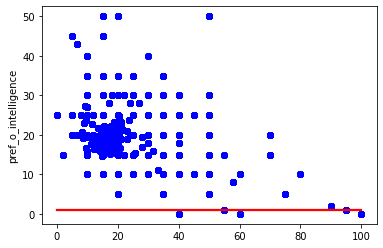

In [6]:
x = data['pref_o_attractive']
y = data['pref_o_intelligence']

#plot logistic regression curve with blue points and red line
sns.regplot(x=[x], y=y, data=data, logistic=True, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

In [7]:
x = data.drop(['pref_o_intelligence','importance_same_religion'], axis=1)
y = data['pref_o_intelligence']

In [8]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
x = data[numeric_cols]

In [9]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x)
x_train = pd.DataFrame(x_train, columns=x.columns)

In [11]:
# remove rows with missing or infinite values
x = x.replace([np.inf, -np.inf], np.nan)
x = x.dropna()
y = y.loc[x.index]

In [12]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

In [13]:
#print(X_train.isnull().sum())
#print(y.isnull().sum())

In [14]:
#np.any(~np.isfinite(exog),axis=0)

In [15]:
#data.isnull().sum()

In [16]:
#data = data.fillna(0)

In [17]:
#import statsmodels.api as sm
#from scipy import stats

x2 = sm.add_constant(x_train)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

MissingDataError: exog contains inf or nans

In [18]:
#from sklearn.linear_model import LogisticRegression 

#logreg = LogisticRegression(solver='liblinear') 
#logreg.fit(X_train, y.values.ravel())

logreg = LogisticRegression(solver='liblinear') 
logreg.fit(x_train, y.values.ravel().astype(float))

NameError: name 'LogisticRegression' is not defined

In [ ]:
import shap 
shap.initjs() 
explainer = shap.LinearExplainer(logreg,x_train) 
shap_values = explainer(x) 

/home/riifo/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/riifo/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.bar(shap_values.abs.max(0))

In [ ]:
shap.plots.bar(shap_values[1])

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

In [ ]:
shap.plots.heatmap(shap_values[:50])

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.plots.scatter(shap_values[:,"age"], color=shap_values)

In [ ]:
shap.plots.force(shap_values[1])

In [ ]:
shap.plots.scatter(shap_values[:,"age"], color=shap_values[:,"gender"])

In [ ]:
shap.plots.bar(shap_values.abs.sum(0))